In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

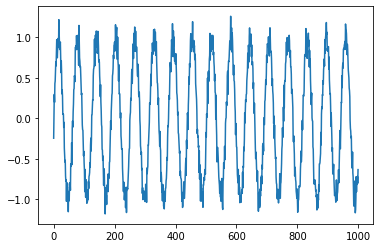

In [16]:
# Defining the synthetic data
series = np.sin(0.1*np.arange(1000)) + np.random.randn(1000)*0.1

# plot it
plt.plot(series)
plt.show()

In [17]:
# Build the dataset
# We will use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (990, 10, 1) Y.shape (990,)


In [26]:
#Build the Simple RNN Model
i = Input(shape=(T, 1))  #every sample is TXD
x = SimpleRNN(50,activation='relu')(i)      #Default activatoin is tanh    (try relu,none, hidden layers-15,50) 
x = Dense(1)(x)           
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.001),
)

In [27]:
# train the Model
r = model.fit(
  X[:N//2], Y[:N//2],
  epochs=80,
  validation_data=(X[N//2:], Y[N//2:]),
)

Epoch 1/80
16/16 [==============================] - 2s 36ms/step - loss: 0.0726 - val_loss: 0.0280
Epoch 2/80
16/16 [==============================] - 0s 21ms/step - loss: 0.0225 - val_loss: 0.0204
Epoch 3/80
16/16 [==============================] - 0s 23ms/step - loss: 0.0187 - val_loss: 0.0184
Epoch 4/80
16/16 [==============================] - 0s 22ms/step - loss: 0.0179 - val_loss: 0.0187
Epoch 5/80
16/16 [==============================] - 0s 26ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 6/80
16/16 [==============================] - 0s 22ms/step - loss: 0.0187 - val_loss: 0.0188
Epoch 7/80
16/16 [==============================] - 0s 21ms/step - loss: 0.0165 - val_loss: 0.0170
Epoch 8/80
16/16 [==============================] - 0s 22ms/step - loss: 0.0161 - val_loss: 0.0167
Epoch 9/80
16/16 [==============================] - 0s 21ms/step - loss: 0.0156 - val_loss: 0.0165
Epoch 10/80
16/16 [==============================] - 0s 26ms/step - loss: 0.0158 - val_loss: 0.0163
Epoch 11/

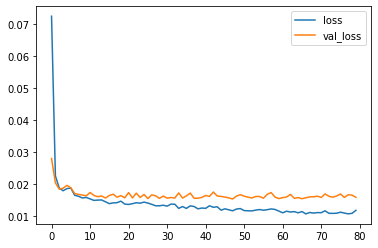

In [28]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

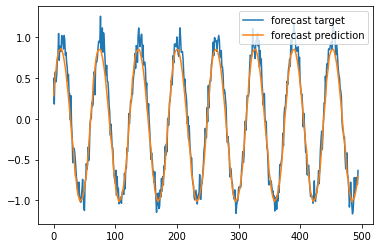

In [29]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[N//2:]
validation_predictions = []

# first validation input
last_x = X[N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0] # 1x1 array -> scalar Input is shape N*T*D  output is N*K - desired is 1*T*1
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
#Rerun the notebook again by adding noise to the data